# intro to scikit-learn

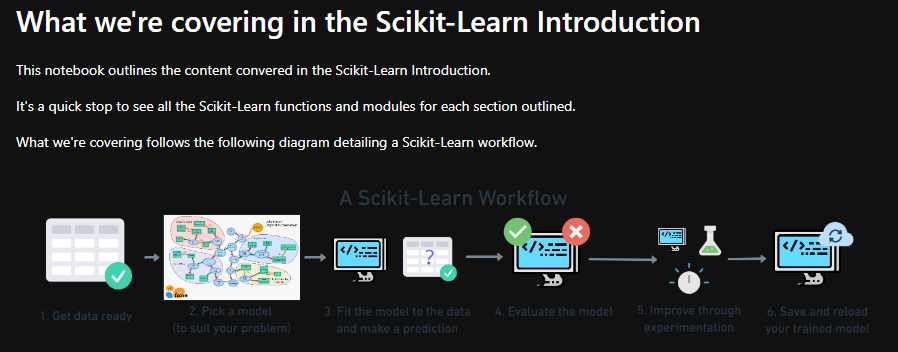

In [1]:
what_were_covering = [
    '0. an end to end scikitlearn workflow',
    '1. getting the data ready',
    '2. choose the righte estimator/algo',
    '3. fit the model',
    '4. evaluate the model',
    '5. improve the model',
    '6. save and load the model',
    '7. put it all together'
]

In [2]:
what_were_covering

['0. an end to end scikitlearn workflow',
 '1. getting the data ready',
 '2. choose the righte estimator/algo',
 '3. fit the model',
 '4. evaluate the model',
 '5. improve the model',
 '6. save and load the model',
 '7. put it all together']

In [3]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

## 0. an end to end scikitlearn workflow

In [4]:
# 1. get the data ready
import pandas as pd
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# create features matrix
x = heart_disease.drop('target',axis=1)

# create labels
y = heart_disease['target']

In [6]:
# 2. choose the right model/ hyperparams
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

# keeping the default params
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
import numpy as np

In [8]:
# 3. fit the model to training data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
clf.fit(x_train, y_train)


RandomForestClassifier()

In [9]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [10]:
# make a prediction
y_preds = clf.predict(x_test)

In [11]:
clf.score(x_train,y_train)

1.0

In [12]:
clf.score(x_test, y_test)

0.8688524590163934

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



In [14]:
confusion_matrix(y_test, y_preds)

array([[22,  5],
       [ 3, 31]], dtype=int64)

In [15]:
accuracy_score(y_test, y_preds)

0.8688524590163934

# 5. improve a model

In [16]:
# try different n_estimators

np.random.seed(42)
for i in range(10,100,10):
    print(f'Trying model with {i} estimators...')
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f' Model accuracy on test set: {clf.score(x_test, y_test) * 100:.2f}%')
    print(' ')

Trying model with 10 estimators...
 Model accuracy on test set: 85.25%
 
Trying model with 20 estimators...
 Model accuracy on test set: 83.61%
 
Trying model with 30 estimators...
 Model accuracy on test set: 83.61%
 
Trying model with 40 estimators...
 Model accuracy on test set: 86.89%
 
Trying model with 50 estimators...
 Model accuracy on test set: 86.89%
 
Trying model with 60 estimators...
 Model accuracy on test set: 85.25%
 
Trying model with 70 estimators...
 Model accuracy on test set: 88.52%
 
Trying model with 80 estimators...
 Model accuracy on test set: 86.89%
 
Trying model with 90 estimators...
 Model accuracy on test set: 86.89%
 


In [17]:
## 6. save the model and load it
import pickle

pickle.dump(clf, open('Random_Forest_model_1.pkl','wb'))           # wb = write binaries
loaded_model = pickle.load(open('Random_Forest_model_1.pkl','rb')) # rb = read binaries

In [18]:
loaded_model.score(x_test,y_test)

0.8688524590163934

In [19]:
## 1. Getting the data ready

three main things to do:
    1.split the data into features and labels(x and y)
    2.filling (imputing) or disregaurding missing values(also called feature encoding)
    3.converting non-numerical values into numerical values

SyntaxError: invalid decimal literal (3931162579.py, line 4)

In [ ]:
heart_disease.head()

In [ ]:
x = heart_disease.drop('target',axis=1)
y = heart_disease['target']
y.head()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [ ]:
# to prove above

x.shape          # (303, 13)
x.shape[0] * 0.8 # 242.4
x.shape[0] * 0.2 # 60.6
(x.shape[0] * 0.8) + (x.shape[0] * 0.2)

In [ ]:
len(heart_disease)

# 1.1 make sure its all numerical

In [ ]:
car_sales = pd.read_csv('car-sales-extended.csv')
car_sales.head()

In [ ]:
car_sales.dtypes, len(car_sales)

In [ ]:
## split x and y

x = car_sales.drop('Price', axis=1)
y = car_sales['Price']

# split into training and testing data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
## build machine learning model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

In [ ]:
# convert string to numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

catagorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   catagorical_features)],
                                   remainder='passthrough') # grabs the catagorical features and replaces all the strings with numbers 

transformed_x = transformer.fit_transform(x)
transformed_x 

In [ ]:
pd.DataFrame(transformed_x) # column 12 is the odometer column

In [ ]:
#one hot encoding
#turn catagories into numbers

In [ ]:
# another way

dummies = pd.get_dummies(car_sales[['Make', 'Colour', 'Doors']])
dummies

In [ ]:
# refit the model

np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

model.fit(x_train, y_train)

In [ ]:
model.score(x_test, y_test)

### what if there were missing values
1. fill with some values
2. remove samples with missing data altogether

In [ ]:
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing

In [ ]:
x = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

catagorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   catagorical_features)],
                                   remainder='passthrough') # grabs the catagorical features and replaces all the strings with numbers 

transformed_x = transformer.fit_transform(x)
transformed_x 

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
# let try to convert the NAN values into numbers


### fill missing data with pandas

In [ ]:
#fill the make column

car_sales_missing['Make'].fillna('missing',inplace=True)

car_sales_missing['Colour'].fillna('missing',inplace=True)
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(),inplace=True)

car_sales_missing['Doors'].fillna(4, inplace=True)

In [ ]:
car_sales_missing.isna().sum()

# remove rows with missing price value

In [ ]:
car_sales_missing.dropna(inplace=True)
car_sales_missing.isna().sum()

In [ ]:
len(car_sales_missing)

In [ ]:
x = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

catagorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   catagorical_features)],
                                   remainder='passthrough') # grabs the catagorical features and replaces all the strings with numbers 

transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x 

### option 2, fill missing values with scikit learn

In [ ]:
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.head()

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
car_sales_missing.dropna(subset=['Price'], inplace=True)
car_sales_missing.isna().sum()

In [ ]:
x = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [ ]:
# fill missing values with scikit learn

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical valuies with missing and numerical valuies with mean

cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define columns
cat_features = ['Make', 'Colour']
door_features = ['Doors']
num_features = ['Odometer (KM)']

# create and imputer (something that fills missing data)

imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer',door_imputer, door_features),
    ('num_imputer',num_imputer, num_features)
])

# transform the data

filled_x = imputer.fit_transform(x)
filled_x

In [ ]:
car_sales_filled = pd.DataFrame(filled_x,
                               columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])
car_sales_filled.head()

In [ ]:
car_sales_filled.isna().sum()

In [ ]:
## convert strings into numbers

catagorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   catagorical_features)],
                                   remainder='passthrough') # grabs the catagorical features and replaces all the strings with numbers 

transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x 

In [ ]:
# now we have data as numbers and not missing values

np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

In [ ]:
len(car_sales_filled), len(car_sales)

In [ ]:
what_were_covering

# choosing the right estimator for your problem

some things to note
* sklearn refers to ML models as algorithms as estimators
* classification problem - predicting a catagory
    *sometimes as clf for short(classifier)
* regression pronlem - predicting a number

In [20]:
# 2.1 picking a machine learning model
# get california housing data set

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [21]:
housing_df = pd.DataFrame(housing['data'], columns = housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [22]:
housing_df['target'] = housing['target']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [23]:
housing_df = housing_df.drop('MedHouseVal', axis=1)
housing_df

KeyError: "['MedHouseVal'] not found in axis"

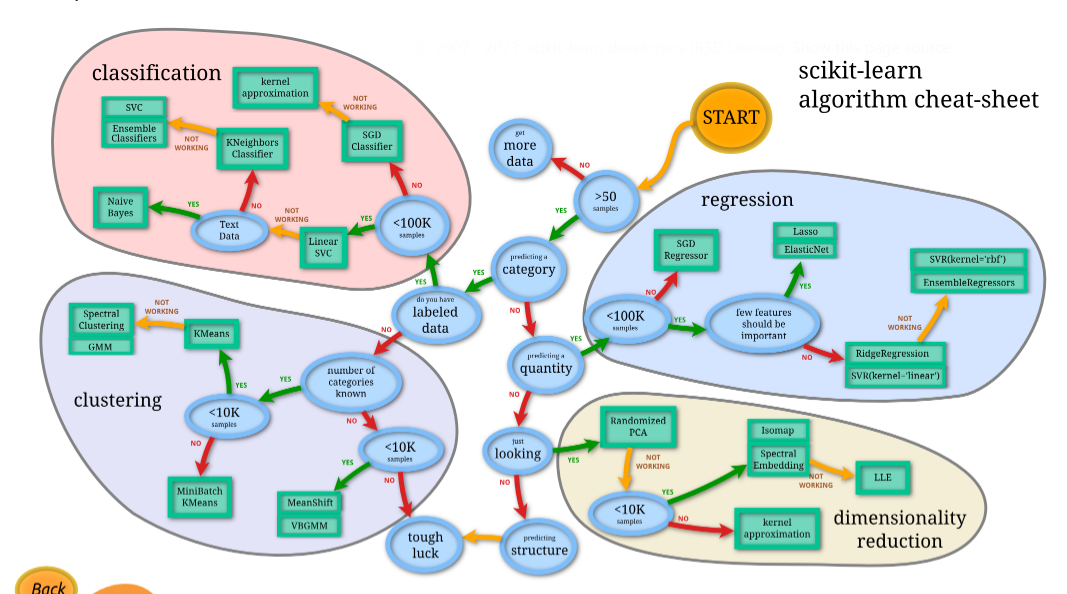

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [ ]:
# splitting features into x and y
from sklearn.linear_model import Ridge
np.random.seed(42)
x = housing_df.drop('target', axis=1)
y = housing_df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
model = Ridge()
model.fit(x_train, y_train)
model.score(x_test, y_test)


What if Ridge didnt work?
trying another one

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = housing_df.drop('target', axis=1)
y = housing_df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

In [ ]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease

In [ ]:
from sklearn.ensemble import RandomForestClassifier

heart_disease = pd.read_csv('heart-disease.csv')

np.random.seed(42)

x = heart_disease.drop('target', axis=1)
y = heart_disease['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

model = RandomForestClassifier()
model.fit(x_train, y_train)
model.score(x_test, y_test)

if you have structured data, use ensemble methods. I not then use deep learning

## 3. fitting the model to the data

* `x` = features,feature variables, data
* `y` = labels, targets, target variables

In [ ]:
heart_disease = pd.read_csv('heart-disease.csv')

np.random.seed(42)

x = heart_disease.drop('target', axis=1)
y = heart_disease['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

model = RandomForestClassifier()
# training  the model
model.fit(x_train, y_train)
# using the patterns found in the training for the test
model.score(x_test, y_test)

In [ ]:
x.head()

In [ ]:
y.head()

### make predictions using the machine learning model(super cool stuff)

# use a trained model to make predictions
## 2 ways

1`predict()`
2.`predict_proba()`

In [ ]:
# use the trained model to make predictions

model.predict(x_test)

In [ ]:
# compare predictions to the truth labels to evaluate model

y_preds = model.predict(x_test)
np.mean(y_preds == y_test)

In [ ]:
model.score(x_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

In [ ]:
what_were_covering

# 4. evaluating a ML model
## Three built in ways to evaluate
    1. estimators `score()` method
    2. The scoring parameter
    3. problem specific metrics

## eval with score method

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create x and y

x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# create train/test 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

model = RandomForestClassifier()

# training  the model

model.fit(x_train, y_train)

# using the patterns found in the training for the test
model.score(x_test, y_test)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create x and y

x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# create train/test 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

model = RandomForestClassifier()

# training  the model

model.fit(x_train, y_train)

# using the patterns found in the training for the test
model.score(x_test, y_test), cross_val_score(model, x, y, cv=5) # cross validation splits the training data k times and reruns the score for each instance

In [ ]:
np.random.seed(42)

clf_single_score = model.score(x_test, y_test)
clf_cross_val_score = np.mean(cross_val_score(model, x, y, cv=5))

# compare the 2
clf_single_score, clf_cross_val_score

### 4.2.1 Classifacation model eval metrics

1. Accuracy
2. area under the ROC curve
3. confusion matrix
4. classifacation report

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, x, y, cv=5)
np.mean(cross_val_score)

**Area under the reciever operator characteristic curve (AUC/ROC)**

* area unde the curve
* ROC curve

** ROC curves are a comparison of a models true positive rate (tpr) versus a models false positive rate (Fpr).*

* True positive = model predicts 1 when the real label is 1
* false positive = model predicts 1 when the real label is 0
* true negative = model predicts 0  when the real label is 0
* false negative = model predicts 0 when the real label is 1

In [ ]:
# create x_test....

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
from  sklearn.metrics import roc_curve

clf.fit(x_train, y_train)
y_probs = clf.predict_proba(x_test)

y_probs[:10], len(y_probs)

In [ ]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

In [ ]:
# creating fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# check the false positive rates
fpr

In [ ]:
# plotting ROC curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the fpr and tpr of a model
    """
    # plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # plot a baseline
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    
    # customize the plot
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('Receiver Operating Characteristic (ROC) curve')

plot_roc_curve(fpr, tpr)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

In [ ]:
## plot perfect ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [ ]:
roc_auc_score(y_test, y_test)

**Confusion Matrix**


a confusion matrix is a quick way to compare the labelsa model predicts and the actual lables it was suppsed to predict.


in essence, giving you and idea of wheer the model is getting confused

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)


confusion_matrix(y_test, y_preds)

In [ ]:
## visually with pd.crosstab

pd.crosstab(y_test,
            y_preds,
            rownames={'Actual labels'},
            colnames={'Predicted labels'})

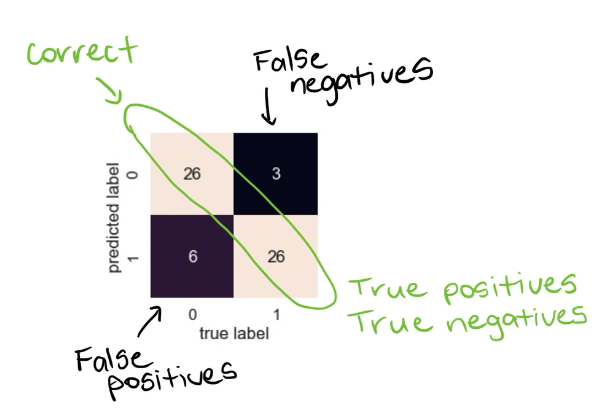

In [ ]:
import seaborn as sns

sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat)


In [ ]:
clf

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, x=x, y=y)

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                       y_pred=y_preds); 

# Classifacation report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

In [ ]:
# example where precision and recall become valuable

disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predics every case is 0

pd.DataFrame(classification_report(
    disease_true,
    disease_preds,
    output_dict=True))



### 4.2.2 Regression model metrics